# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
# Dataset Information:
# The dataset weather-data.csv is obtained from IOWA Environmental Mesonet - Iowa State University.

# Columns for this dataset:

# station: Acronym for the place of data capture.
# valid: Date and time of capture.
# tmpc: Temperature of the environment in celsius.
# dwpc: Temperature of the dew point in the environment in celsius.
# relh: Relative humidity of the environment in percentage.
# sknt: Wind Speed in knots.
# gust: Wind Gust in knots.
# peak_wind_drct: Peak Wind Gust Direction (from PK WND METAR remark). (deg).

dataset.describe() 

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [4]:
#checking for null-values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

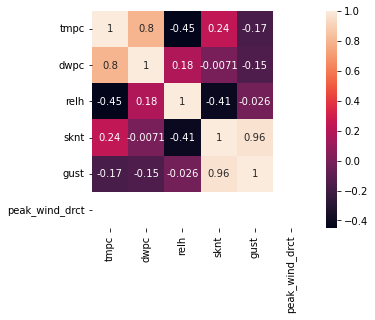

In [5]:
#Correlation plot between all variables of interest.
#Values high positive or negative values close to 1 have a strong correlation.
#We see from this data that there is a strong replationship between
#dwpc and tmpc (temperature of the dew point and temperature of the environment), but not as much for the other variables.
#also a very strong relationship between wind speed in knots and wind gust in knots
sns.heatmap(dataset.corr(), annot=True, square=True)

In [6]:
#converting valid to datetime to make additional findings
dataset['valid'] = pd.to_datetime(dataset['valid'],format='%Y-%m-%d %H:%M')

dataset['year']=dataset['valid'].dt.year 
dataset['month']=dataset['valid'].dt.month 
dataset['day']=dataset['valid'].dt.day
dataset['timehour']=dataset['valid'].dt.hour
dataset['timeminute']=dataset['valid'].dt.minute

In [7]:
#more readable matrix
dataset.corr().style.background_gradient(cmap='coolwarm')

d:\Anaconda\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
d:\Anaconda\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,tmpc,dwpc,relh,sknt,gust,peak_wind_drct,year,month,day,timehour,timeminute
tmpc,1.000000,0.795403,-0.451405,0.235222,-0.168029,nan,0.009623,-0.319187,-0.004562,-0.220016,0.000708
dwpc,0.795403,1.000000,0.177898,-0.007093,-0.153984,nan,0.001364,-0.358895,0.008193,-0.029649,0.001841
relh,-0.451405,0.177898,1.000000,-0.414763,-0.025576,nan,-0.012113,-0.017478,0.019704,0.312912,0.001741
sknt,0.235222,-0.007093,-0.414763,1.000000,0.962926,nan,0.005584,0.122855,-0.030287,-0.229439,-0.003210
gust,-0.168029,-0.153984,-0.025576,0.962926,1.000000,nan,0.011841,-0.039603,0.018754,-0.031662,0.041568
peak_wind_drct,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
year,0.009623,0.001364,-0.012113,0.005584,0.011841,nan,1.000000,-0.001435,0.000228,0.001017,0.000492
month,-0.319187,-0.358895,-0.017478,0.122855,-0.039603,nan,-0.001435,1.000000,0.009593,0.000030,0.000285
day,-0.004562,0.008193,0.019704,-0.030287,0.018754,nan,0.000228,0.009593,1.000000,-0.000240,-0.000378
timehour,-0.220016,-0.029649,0.312912,-0.229439,-0.031662,nan,0.001017,0.000030,-0.000240,1.000000,-0.000103


C:\Users\st140\AppData\Local\Temp/ipykernel_24800/2057357813.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


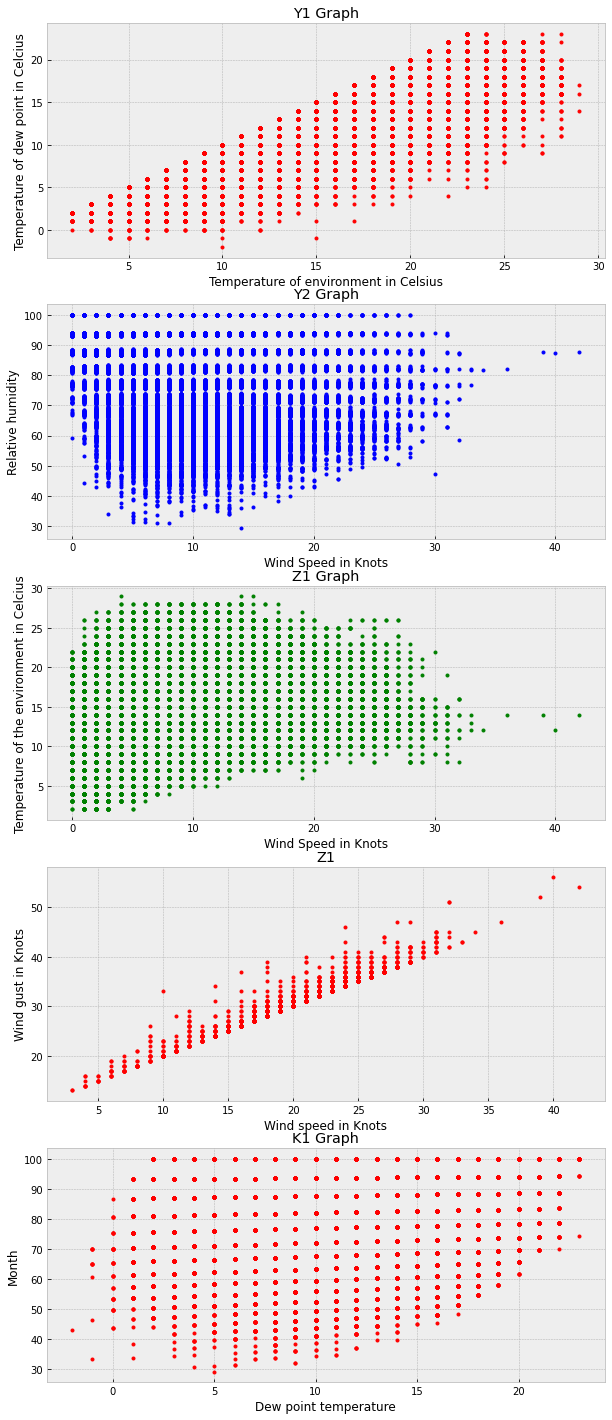

In [78]:
# fig = plt.figure()

# plt.plot(dataset['tmpc'], dataset['dwpc'], 'r.')

# plt.xlabel('tmpc')
# plt.ylabel('dwpc')
# plt.title('twpc vs dwpc')
# plt.show()

plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)


ax1.plot(dataset["tmpc"], dataset["dwpc"], "r.")
ax1.set_title("Y1 Graph")
ax1.set_xlabel("Temperature of environment in Celsius")
ax1.set_ylabel("Temperature of dew point in Celcius")

ax2.plot(dataset["sknt"], dataset["relh"], "b.")
ax2.set_title("Y2 Graph")
ax2.set_xlabel("Wind Speed in Knots")
ax2.set_ylabel("Relative humidity")

ax3.plot(dataset["sknt"], dataset["tmpc"], "g.")
ax3.set_title("Z1 Graph")
ax3.set_xlabel("Wind Speed in Knots")
ax3.set_ylabel("Temperature of the environment in Celcius")

ax4.plot(dataset["sknt"], dataset["gust"], "r.")
ax4.set_title("Z1")
ax4.set_xlabel("Wind speed in Knots")
ax4.set_ylabel("Wind gust in Knots")

ax5.plot(dataset["dwpc"], dataset["relh"], "r.")
ax5.set_title("K1 Graph")
ax5.set_xlabel("Dew point temperature")
ax5.set_ylabel("Month")

fig.set_size_inches(10,25)

fig.show()


d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dwpc', ylabel='relh'>

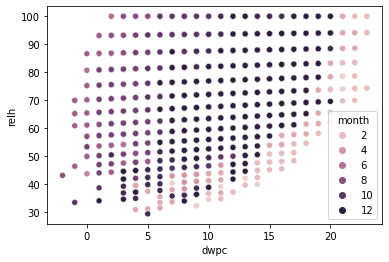

In [9]:
#interesting visualisation showing how the relative humidity and dew point varies by month
sns.scatterplot(dataset["dwpc"], dataset["relh"], hue=dataset['month'])

# Data Processing

In [10]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html
dataset.head()


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct,year,month,day,timehour,timeminute
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,NaN,2015,1,1,0,0
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,NaN,2015,1,1,0,30
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,NaN,2015,1,1,1,0
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,NaN,2015,1,1,1,30
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,NaN,2015,1,1,2,0


In [11]:
#dropping unnecessary columns
dataset2 = dataset.drop(columns=["valid", "peak_wind_drct", "gust"])
dataset2.head()

,station,tmpc,dwpc,relh,sknt,year,month,day,timehour,timeminute
0,NZAA,21.0,11.0,52.77,15.0,2015,1,1,0,0
1,NZAA,21.0,10.0,49.37,16.0,2015,1,1,0,30
2,NZAA,21.0,12.0,56.38,16.0,2015,1,1,1,0
3,NZAA,21.0,13.0,60.21,16.0,2015,1,1,1,30
4,NZAA,21.0,12.0,56.38,16.0,2015,1,1,2,0


Text(0, 0.5, 'Temperature of dew point in Celcius')

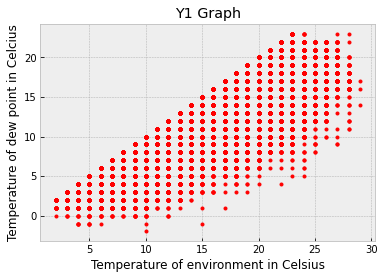

In [12]:
#We want to know the relationship between env. temp and dew point temp.
#It is something affected by relative humiditiy, so we will try keep it constant
#We will do this by filtering the data to keep humidity between 45 and 50
dataset3 = dataset[(dataset["relh"]>45) & (dataset["relh"]<50)]
dataset3 = dataset.loc[:,["tmpc","dwpc"]]

plt.style.use("bmh")
fig, (ax1) = plt.subplots(nrows=1, ncols=1, squeeze=True)

ax1.plot(dataset3["tmpc"], dataset3["dwpc"], "r.")
ax1.set_title("Y1 Graph")
ax1.set_xlabel("Temperature of environment in Celsius")
ax1.set_ylabel("Temperature of dew point in Celcius")


# Data Modelling

In [13]:
import datetime as dt
from datetime import timedelta

In [14]:

#filtering data by correlated datasets only
dataset5 = dataset.loc[:,["tmpc","dwpc","relh","month","timehour","sknt"]]


In [15]:
dataset5

,tmpc,dwpc,relh,month,timehour,sknt
0,21.0,11.0,52.77,1,0,15.0
1,21.0,10.0,49.37,1,0,16.0
2,21.0,12.0,56.38,1,1,16.0
3,21.0,13.0,60.21,1,1,16.0
4,21.0,12.0,56.38,1,2,16.0
...,...,...,...,...,...,...
103708,19.0,14.0,72.74,12,21,5.0
103709,19.0,14.0,72.74,12,22,6.0
103710,20.0,14.0,68.35,12,22,6.0
103711,20.0,14.0,68.35,12,23,7.0


In [16]:
dataset5.loc[:,["dwpc","relh","month","timehour","sknt"]]

,dwpc,relh,month,timehour,sknt
0,11.0,52.77,1,0,15.0
1,10.0,49.37,1,0,16.0
2,12.0,56.38,1,1,16.0
3,13.0,60.21,1,1,16.0
4,12.0,56.38,1,2,16.0
...,...,...,...,...,...
103708,14.0,72.74,12,21,5.0
103709,14.0,72.74,12,22,6.0
103710,14.0,68.35,12,22,6.0
103711,14.0,68.35,12,23,7.0


In [23]:
dataset5.dropna(inplace=True)

In [24]:
#using a regression model as our data is numeric
#Train Dataset: Used to fit the machine learning model.
#Test Dataset: Used to evaluate the fit machine learning model.
#test size = 0.2 means 20% data goes to test
X_train, X_test, y_train, y_test = train_test_split(dataset5.loc[:,["dwpc","relh","month","timehour","sknt"]], dataset5["tmpc"], test_size=0.2)

In [25]:
#importing libraries to make model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [26]:
#using the linear regression model because we are working with numerical data.
#other possible models: decision tree regressor, randomforest regressor, xgboost regressor, 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.score(X_test, y_test)

0.9955647218561257

In [28]:
#test values
#"dwpc","relh","month","timehour","sknt"
model.predict([[2,3,4,5,6]])



array([21.47674009])

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.

The model has very good performance with an R^2 value of 0.996. This means that the variables of dwpc","relh","month","timehour","sknt" that we have determined to be important, and have processed through the exploratory analysis are a good predictor of environment temperature. It is interesting to note that there is a strong relationship between dwpc and month.